In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

# Messy Data and Data Cleaning

### Based on [Quartz Bad Data Guide](https://github.com/Quartz/bad-data-guide)

## Outline

* Data Generating Processes.
* Introduction to field types.
* Outliers: how to spot them and fix them.
* Missing values: understanding them and dropping them.

## There is no such thing as 'raw data'.

* Data are the result of measurements that must be recorded.
* Humans design the measurements and record the results.
* Data is *always* an imperfect record of the underlying processing being measured.

## Data Generating Process

* A **data generating process** is the underlying, real-world (probabilistic) mechanism that generates the observed data. 
* Observed data is an incomplete artifact of the data generating process.
* A data generating process is what a statistical model attempts to describe.

### Example: Physical Measurements
* Problem: undestand the trajectory of a thrown object
* Data: repeatedly throw ball and measure horizontal distance three times.
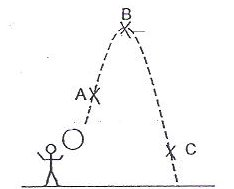

### Example: Physical Measurements

* Measurement Error: Is there noise? is it random or biased?
* Inadequacy of measurement design:
    - How well does these data represent the question?
    - Ball too specific? Are conditions too particular?
* Can these data answer different (related) questions?
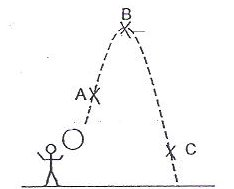

### Example: Unemployment Data
* Problem: predict the effect policy X has on the US labor market
    - Does it decrease unemployment? Increase wages?
* Data: [labor force data](https://www.bls.gov/cps/cps_htgm.pdf) collected by the BLS


### Example: Unemployment Data
* Sample quality: Is the BLS data a sample or census?
* Measurement; who is counted as:
    - employed? unemployed? underemployed? not in the labor force?
* The data are generated according to a *political* process!
    - For an introduction, see [this article](https://www.nytimes.com/2018/09/14/opinion/columnists/great-recession-economy-gdp.html)

## Data Provenance

Understanding as much as possible about the lineage of data from 
1. The assumptions on the data generating process, to
2. the initial measurements of that (or a similar) process, to  
3. the data in its eventually acquired form.

### Understanding data provenance

<img src="https://imgs.xkcd.com/comics/data_pipeline.png">

# Data Cleaning

## Data Cleaning

* The process of tranforming data:
    - into a faithful representation of an underlying data generating process 
    - to facilitate subsequent analysis.

* In practice, data cleaning is often detective work to understand data provenance.
    - **always be skeptical of your data!**

## Data cleaning often addresses:
* The structure of the recorded data.
* The encoding and format of the values in the data.
* Corrupt and "incorrect" data.
* Missing values in data.
* ...

## Structure of Data

* Data representation and storage considerations include:
    - performance of processing (time/space),
    - fidelity to original measurements,
    - the source(s) of origin
    
* In preparing data for analysis, you must:
    - understand previous processing decisions (data provenance).
    - make your own data processing decisions.

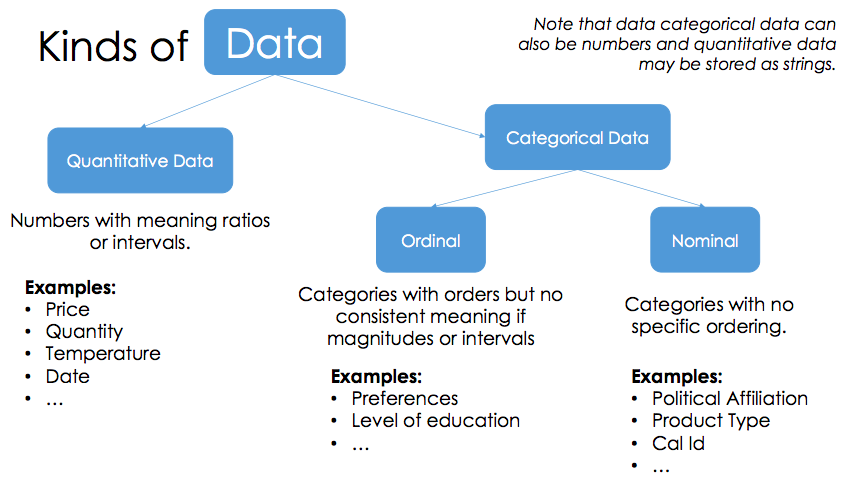

### Check Point. Question 1.

**Price in dollars of a product?**

||Answers|
|---|---|
|A|Quantitative|
|B|Ordinal|
|C|Nominal|

### Check Point. Question 2.

**Star Rating on Yelp?**

||Answers|
|---|---|
|A|Quantitative|
|B|Ordinal|
|C|Nominal|

### Check Point. Question 3.

**Date an item was sold?**

||Answers|
|---|---|
|A|Quantitative|
|B|Ordinal|
|C|Nominal|

### Check Point. Question 4.

**Day of the week an item was sold?**

||Answers|
|---|---|
|A|Quantitative|
|B|Ordinal|
|C|Nominal|

### Check Point. Question 5.

**What is your Credit Card Number?**

||Answers|
|---|---|
|A|Quantitative|
|B|Ordinal|
|C|Nominal|

### Answers:

|||
|---|---|
|Price in dollars of a product|Quantitatave|
|Star Rating on Yelp|Ordinal|
|Date an item was sold|Quantitative|
|Day of week an item was sold|????|
|Credit Card Number|Nominal|

## Converting data types in Pandas

### Student dataset
- **Student ID, Student Name** (should be clear)
- **Month, Day, Year**: date when student was accepted to UCSD
- **2018, 2019 tuitions and growth** (should be clear)
- **Paid**: Indicates if tuition is paid yet
- **DSC80 Final grade**: Some students may take class for Pass/Fail

In [ ]:
df = pd.read_csv("Data.csv")
df

Ask what looks fishy? What needs to be done to compute statistics?

### What is the sum of tuition paid in 2018 and 2019?

In [ ]:
df

In [ ]:
total = df['2018 tuition'] + df['2019 tuition']
total

What did you expect and what had happen?

Ans: An **object** is a **string** in Pandas so it performs a concatenation instead of addition.
We can check all types before performing any operations on data using `df.dtypes` command.

### Check the data types of the student table
* What data type *should* each column have?
* What kinds of data should each column have?
    - Quantitative, Catgorical (Ordinal, Nominal)

In [ ]:
df.dtypes

### Cleaning up: `Student ID`

* `Student ID` is a `float64`, should be `int64`
* May be a float value due to earlier processing with e.g. Excel.
* Change the type using `.astype` method
    - `.astype` returns a copy!

In [ ]:
df['Student ID'] = df['Student ID'].astype(np.int64)
df

### Cleaning up: `20xx tuition`

* `20xx tuition` are stored as objects (strings), not numerical values.
* The formatting character ($) causes the entries to be interpreted as strings.
* Use `str` methods to strip the dollar sign.

In [ ]:
# try this!
df['2018 tuition'].astype(np.float64)

In [ ]:
# strip the $
df['2018 tuition'].str.strip('$').astype(np.float64)

In [ ]:
for col in df.columns:
    if 'tuition' in col:
        df[col] = df[col].str.strip('$').astype(np.float64)
        
df

### Cleaning up: `Paid`

* The `Paid` column should be either `bool` type, or {0,1}.
* Y/N typical values from human entry.
* Use the `replace` method.

In [ ]:
df['Paid'] = df['Paid'].replace({'Y': True, 'N': False})
df

### Cleaning up: `Month, Day, and Year`
* Each are `int64` types; this could be *fine* for certain purposes.
* Could store as `objects` of the form `Year-Month-Day`
    - String sorting coincides with date sorting
* Could store as `datetime64` objects (later).

In [ ]:
# What is happening with adding a Series and a string
(
    df['Year'].astype(str) + '-' + 
    df['Month'].astype(str).str.zfill(2) + '-' + 
    df['Day'].astype(str).str.zfill(2)
)

### Cleaning up: `DSC 80 Final Grade`

* `DSC 80 Final Grade` stored as an object.
    - most entries should be numeric;
    - final entry cannot be converted.
* Can use `pd.to_numeric(Series, errors='coerce')`.
    - Be careful with this!
    - `errors='coerce'` can cause uninformed destruction of data.

In [ ]:
df

In [ ]:
df['DSC 80 Final Grade'] = pd.to_numeric(df['DSC 80 Final Grade'], errors='coerce')
df

### Cleaning up: `Student Name`
* Need the `Student Name` column to have form **Last Name, First Name**.
* Use a custom function and the `apply` method.
    - `Series.apply(func)` applies the function `func` to each entry of `Series`.

In [ ]:
df['Student Name']

In [ ]:
def transpose_name(name):
    firstname, lastname = name.split()
    return lastname + ', ' + firstname

transpose_name('Aaron Fraenkel')

In [ ]:
df['Student Name'].apply(transpose_name)

### Cleaning data types: conclusion

* The `Series.astype(type)` method requires every entry of `Series` is coercible to `type`.
* Pandas `pd.to_numeric(Series)` converts entries of `Series` to numeric data types.
    - if `errors='coerce'`, any non-coercible entry is replaced with `NaN`.
* `Series.apply(func)` applies `func` to every entry of `Series`.

### More data type ambiguities


|object number|weight|date made|location|
|---|---|---|---|
|1|87|10/9/18|Los Angelos|
|2|78|9/10/18|Los Angeles|

1. Can you lift object 1?
2. Which object is made in September?
3. Were the two objects made in the same place?


### More data type ambiguities


1. 1537660383 looks like a number, but is probably a date (Unix timestamp)

2. "USD 1,000,000" looks like a string, but is actually a number and a unit.

3. 02111 looks like a number, but is really a zip code (and isn't equal to 2,111)

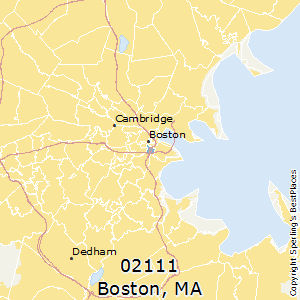


## Data Forensics: is the data faithful?

* [Quartz Bad Data Guide](https://github.com/Quartz/bad-data-guide)
> An exhaustive reference to problems seen in real-world data along with suggestions on how to resolve them.
* Journalists are naturally skeptical: is the data unfaithful? is the suspicious outlier real?

## How well does the data capture "reality"

* Does my data contain unrealistic or "incorrect" values?
    - Dates in the future for events in the past
    - Locations that don't exist
    - Negative counts
    - Misspellings of names
    - Large outliers


# How well does the data capture "reality"

    
* Does my data violate obvious dependencies?
    - E.g., age and birthday don't match 
    

* Was the data entered by hand?
     - Spelling errors, fields shifted …
     - Did the form require fields or provide default values?
     
* Are there obvious signs of curb stoning (data falsification):
    - Repeated names, fake looking email addresses, repeated use of uncommon names or fields.

### How to fix unfaithful data

* Identify and understand the problem first!
* No single easy fix:
    - Depends on the specific field and how it's unfaithful.
    - Depends on the question being asked and answered.
* Sample solutions:
    - Drop the unfaithful data (implications on your sample!)
    - Replace unfaithful data (may bias your sample!)

# Vehicle Stop Data. Practical Example

## Data Source

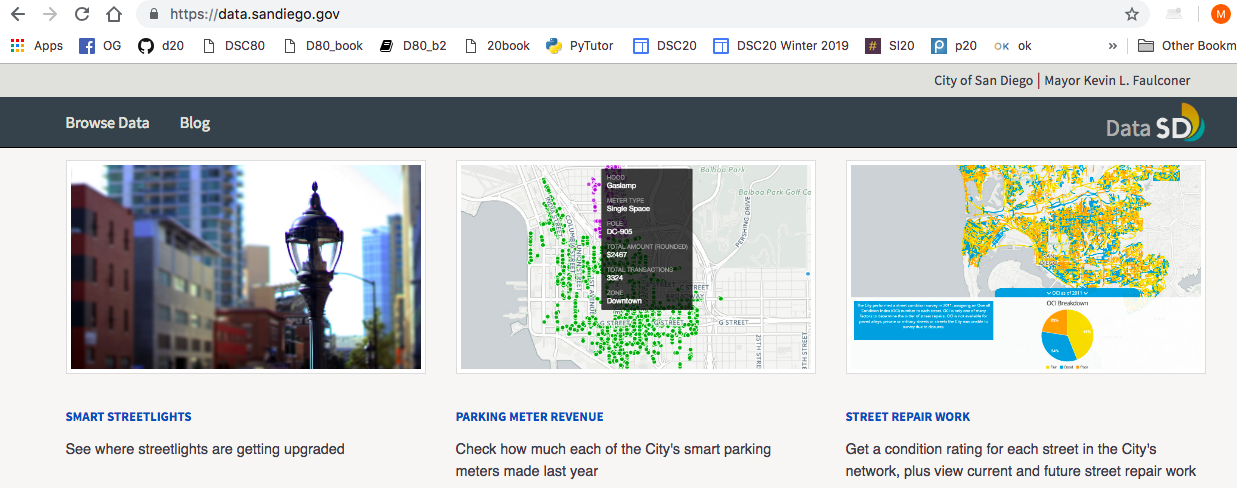


# Police Vehicle Stops

Vehicle stops made by the San Diego Police Department. 

Vehicle Stops files contain all vehicle stops for a given year.

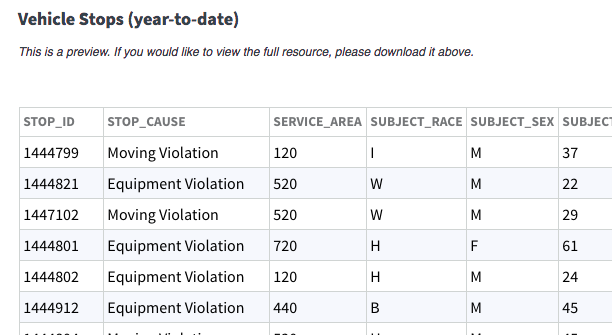

# SDPD Vehicle Stop Data


### Identifying messy data, general questions. 

1. Check the data types, notice any issues? What should we do?
2. String type fields have consistent values?
3. No missing values that we don't understand?
4. Are all values look in a reasonable range?
5. How do we deal with the messiness we found?

In [ ]:
stops = pd.read_csv("Vehicle_stops_2016_datasd.csv")
stops.head()

### SDPD vehicle stops: data types
* Are the data types correct?
* Are they easily fixable?

In [ ]:
# are the data types correct? How to fix them?
stops.info()

In [ ]:
# we can inspect different slices of the table 

from ipywidgets import interact

def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 9]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 9))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

df_interact(stops)

### SDPD vehicle stops: unfaithfulness
* Are there suspicious values?
* If a value is suspicious, can we trust the observation?
* Age: Nonsensical? Too old? Too young?

In [ ]:
stops['subject_age'].unique()

In [ ]:
ages = pd.to_numeric(stops['subject_age'], errors='coerce')
ages.head()

In [ ]:
ages.describe()

In [ ]:
# drop the rows? change age value to null? Is there really a 220 year old? (investigate!)
stops[(ages > 100)]

In [ ]:
stops[ages == 0]

In [ ]:
ages.loc[lambda x:(0<=x) & (x<16)].value_counts()

In [ ]:
stops[(0 < ages) & (ages < 16)]

### SDPD data: unfaithful `subject_age`

* Values of 'No Age' and 0 likely explicit null values
* Unusually small/large ages errors in data entry?
    - Rest of record is well formed.
* Hard to tell for ages 14,15.
    - Each has more than one occurance; possibly real?

### SDPD vehicle stops: human entered data
* Which fields were likely entered by a human?
* Which fields were likely generated by code?
    - what was the original source?

In [ ]:
# stop cause
stops.stop_cause.value_counts()

In [ ]:
# age distribution -- reasonable ages (e.g. 15-85)
ages.loc[lambda x:(x > 15) & (x<=85)].plot(kind='hist', bins=70)

In [ ]:
# computer generated?
stops[['timestamp', 'stop_date', 'stop_time']].head()

In [ ]:
stops[['timestamp', 'stop_date', 'stop_time']].tail(10)

## Unfaithful data vs Outliers

* Unfaithful data are data that doesn't accurately represent the data generating processing being measured.
* Outliers are "ununsual" observations, unlike the rest of the data. They may be unfaithful, but they may be real (and interesting) as well! 
* The two are hard to tell apart; doing so often requires research.

# Outliers

* **Consistently "nonsense" values**
    - Is it a product of the data ingestion process? Time field has year 1899? Is it an inferred “default” value?
    - Solution: Change the value to the correct one!
    
* **Abnormal artifacts from the data collection process**
    - E.g. unreasonable spikes in recorded ages at round numbers (25, 35, 45)
    - Solution: Try "smoothing" (e.g. binning the ages)
        
* **Unreasonable outliers**
    - Data points with unrealistic and highly unreasonable values. E.g. age = 200
    - Solution: filter it? Maybe it points to bugs in the data collection? Maybe it's real and you should investigate!

# Missing Values

## Many reasons for missing values

* Missing values in a dataset can occur from:
    - Intentional logic, where a value doesn't make sense.
    - A non-response in the measurement process.
    - Mistakes in the recording process
    - ...
    
* Missing values are most often encoded with:
    - `NULL`, `None`, `NaN`, `""`

## Missing values come in many forms

* Missing values can appear as 'placeholder' values:
    - All forms of `0` is a common substitute for null.
    - -1 is column if a column must be non-negative.
    - 1900 and 1970 if a nonnull date is required.

## Missing values come in many forms

* These 'Missing Values' may be possible 'real' values!
* "Null Island" at 0°00'00.0"N+0°00'00.0"E
    - Null Island a popular jogging location on Strava fitness tracking app.
    - https://en.wikipedia.org/wiki/Null_Island

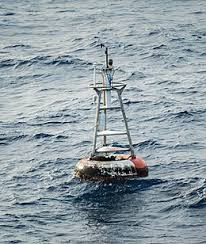

### Messy missingness in vehicle stops data
* What are the non-`NaN` null values in the SDPD data?
    - Service Area: 'Unknown'
    - Subject Age: 0
    - Others?

In [ ]:
stops.head()

## Handling null values in Pandas

* Null values are encoded using NumPy's `NaN` object, which is of float type.
* Method `.isnull()` for DataFrame/Series detects missing values.
    - returns a boolean DataFrame/Series!
* Methods `.dropna()` and `.fillna()` handle missing data.

In [ ]:
# proportion of people without an age recorded
stops.subject_age.isnull().mean()

In [ ]:
# all columns null percentage
stops.isnull().mean()

### Handling null values: dropping observations
* What happens if any row with a null value is dropped?
* Best to not drop observations until it's needed!

In [ ]:
stops.shape

In [ ]:
stops.dropna().shape

In [ ]:
# Percentage of dataset dropped:
stops.isnull().any(axis=1).mean()

### `.dropna` method

* `.dropna()` drops rows containing *at least one* null value.
* `.dropna(how='all')` drops any row that contains *only* null values.
* `.dropna(axis=1)` drops *columns* containing at least one null value.
* Other keyword arguments: `thresh`, `subset`

In [ ]:
nans = pd.DataFrame([[0,1,np.NaN], [np.NaN, np.NaN, np.NaN], [1, 2, 3]])
nans

In [ ]:
nans.dropna(how='any')

In [ ]:
nans.dropna(how='all')

In [ ]:
nans.dropna(axis=1)

In [ ]:
nans.dropna(subset=[0,1])

### `.fillna` method

* `.fillna(val)` fills null entries with value `val`.
* `.fillna(dict)` fills null entries using a dictionary `dict` of column/row values.
* `.fillna(method='ffill')` fills null entries using neighboring non-null values.

In [ ]:
nans

In [ ]:
# fill with a fixed value
nans.fillna("FILLED!")

In [ ]:
# fill using a column-dictionary
nans.fillna({0:'f0', 1:'f1', 2:'f2'})

In [ ]:
# fill with the column mean
means = {c:nans[c].mean() for c in nans.columns}
nans.fillna(means)

In [ ]:
# backfill up columns
nans.fillna(method='bfill')

In [ ]:
# forward fill down columns
nans.fillna(method='ffill')

## Data Types and `NaN`

* The result of *any* comparison (=,!=,<,>) with `NaN` is `False`.
     - Use functions for checking null: `np.isnan`, `np.isnull`
* `NaN` is of float-type.
* Be careful of Pandas type-coercian with `NaN`!

In [ ]:
for x in nans.iloc[0]:
    if x == np.NaN:
        print("it's NaN!")
    else:
        print('nope!')

In [ ]:
for x in nans.iloc[0]:
    if np.isnan(x):
        print("it's NaN!")
    else:
        print('nope!')

In [ ]:
# series with null: ints are cast as float
nans = pd.Series([0,1,np.NaN])
nnan = pd.Series([0,1,1])

In [ ]:
# filled in: of float type
nans.dtype, nnan.dtype

### `int`s and `NaN`s: a gotcha in Pandas

* There is no integer representation for NaN: http://pandas.pydata.org/pandas-docs/stable/gotchas.html#support-for-integer-na
    - The usual workaround is to simply use floats.
    - Support for `NaN` values in integer arrays are available in the next version of [Pandas 0.24](http://pandas-docs.github.io/pandas-docs-travis/whatsnew/v0.24.0.html#optional-integer-na-support).

* You can mix `NaN` values in an object array with `str` types as well.

In [ ]:
# work with floats (annoying!)
phones = pd.Series([6197549274, 8584236457, np.NaN])
phones

In [ ]:
# store as strings + a float for NaN
phones.apply(lambda x:str(int(x)) if pd.notnull(x) else x)

# Understanding How Data is Absent

* Missing by Design (MD)
    
* Missing Completely at Random (MCAR)
    
* Missing at Random (MAR)
    
* Not Missing at Random (NMAR)

# Missing by Design (MD)

* The field being absent is deterministic. 
* A function of the rows of the dataset that can:
    - exactly predict when a colum will be null,
    - with only knowledge of the other columns.

# Missing Completely at Random (MCAR)

* The missing value isn't associated to the (actual, unreported) value itself, nor the values in any other fields.
* The missingness is unconditionally uniform across rows.
* Example 1: additional questions in a survey are posed on a random sample of respondents.
* Example 2: Water damage to paper forms prior to entry (assuming shuffled forms).

# Missing at Random (MAR)

* A missing value may depend only on values of other fields, but not its own
* The missingness is uniform across rows, perhaps conditional on another column.
* Example 1: service workers are less likely to report income.
* Example 2: for really sick patients, clinicians may not draw blood for routine labs.

# Not Missing at Random (NMAR)

A missing value depends on the value of the (actual, unreported) variable that's missing.
Example 1: people with high income are less likely to report income.
    


### Missingness and `subject_age` in SDPD stops data

- Hypothesis: `subject_age` is missing when driver has no driver's license.
    - an assumption about the Data Generating Process.
    
- MCAR? Do other fields look the same independent of `subject_age` being null?
- MAR? E.g. no DL because undocumented (missing only conditional on `subject_race`)?
- NMAR? E.g. no DL because underage.

It's very tricky to distinguish between these with certainty!

# Exercises

1. Remove the column that only contains missing values. 
    - ans: `df.drop(col_name, axis=1)`
    - ans: `df.dropna(axis=1, how="all")`
2. Do man or women speed more often?
    - ans1: `stops[stops.stop_cause =='Moving Violation'].subject_sex.value_counts(normalize=True)`
    - ans2: `stops[(stops.stop_cause =='Moving Violation') & (stops.subject_sex=='M')].shape[0]`
    - ans3: `stops[stops.subject_sex=='M'].stop_cause.value_counts(normalize=True)`



In [ ]:
stops.head(5)

In [ ]:
stops[stops.stop_cause =='Moving Violation'].subject_sex.value_counts()

In [ ]:
m = stops[stops.subject_sex=='M'].stop_cause.value_counts(normalize = True)
m

In [ ]:
f = stops[stops.subject_sex=='F'].stop_cause.value_counts(normalize = True)
f